# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



### 1. Importación del Dataset con Pandas
Importamos panda y tambien leemos el csv con los datos de las calificaciones.Para terminar mostrando 10 de esos datos


In [2]:
import pandas as pd

df = pd.read_csv("datasets_calificaciones.csv")

df.head(10)


,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%
5,javier soto,fisica,5.8,6.5,6,80%
6,sofia díaz,ciencias sociales,9.5,9.1,,98%
7,miguel fernández,literatura universal,8,7.8,8.2,85%
8,valentina ruiz,matematicas,7,,7.8,90%
9,diego castro,fisica,6.8,7.2,7.5,93%


### 2. Exploración Inicial de los Datos
1. En la primera linea, se muestra la primeras 5 filas.
2. En la segunda linea, se estan mostrando los tipos de datos que hay dentro del csv
3. Para la tercela linea mostramos las tablas y la cantidad de datos nulos que tiene dicha tabla
4. Y para la ultima linea mostramos la cantidad de valores nulos que hay en todo el csv
   

In [ ]:

print(f"Las primeras 5 filas: \n {df.head(5)}")

print(f"Los tipos de datos son: \n {df.dtypes}")

print(f"Las tablas con valores nulos son: \n {df.isnull().sum()}")

print(f"La cantidad de valores nulos dentro del csv es: {df.isnull().sum().sum()}")


### 3. Limpieza y Normalización de los Datos
1. Para el primer bloque que esta comentado para evitar errores, convertimos la asistencia en un valor entero (int). Para ellos tuvimos que borrar todos valores no numericos que seria el "%". En esa bloque de codigo primero hay que ejecutar el "Replace", para luego ejecutar el "Astype", sino ocurre un error.
2. Para el segundo bloque, lo que hacemos es convertir las notas de los parciales en un numero y si existen valores nulos, lo convertimos en 0
3. Por ultimo en el tercer bloque de codigo hacemos todos correcciones gramaticas y convertimos todos los valores a mayusculas.

In [ ]:
df["Asistencia"] = df["Asistencia"].str.replace("[\%,]", "", regex=True) 
df["Asistencia"] = df["Asistencia"].astype(int)
df.loc[df['Asistencia'] > 100, 'Asistencia'] = 100

cols_notas = ["Parcial 1", "Parcial 2", "Final"]
df[cols_notas] = df[cols_notas].apply(pd.to_numeric, errors="coerce").fillna(0)
df.info()

print(df["Materia"].unique())

df["Materia"] = df["Materia"].str.replace("matematicas", "Matemáticas")
df["Materia"] = df["Materia"].str.replace("PROGRAMACION BASICA", "PROGRAMACIÓN BÁSICA")
df["Materia"] = df["Materia"].str.replace("FISICA", "FÍSICA")
df["Materia"] = df["Materia"].str.replace("QUIMICA", "QUÍMICA")

df["estudiante"]=df["estudiante"].str.upper()

df["Materia"] = df["Materia"].str.upper()


df.head(10)






<>:1: SyntaxWarning: invalid escape sequence '\%'
<>:1: SyntaxWarning: invalid escape sequence '\%'
C:\Users\ticia\AppData\Local\Temp\ipykernel_5188\3678320289.py:1: SyntaxWarning: invalid escape sequence '\%'
  df["Asistencia"] = df["Asistencia"].str.replace("[\%,]", "", regex=True)
C:\Users\ticia\AppData\Local\Temp\ipykernel_5188\3678320289.py:1: SyntaxWarning: invalid escape sequence '\%'
  df["Asistencia"] = df["Asistencia"].str.replace("[\%,]", "", regex=True)


AttributeError: Can only use .str accessor with string values!

### 4. Obtención de Estadísticas Descriptivas
Calculamos estadísticas descriptivas luego de limpiar los datos. También se agrupan los promedios por materia.

In [5]:
#Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

# promedios_por_materia = df.groupby("Materia")[cols_notas].mean()

# promedios_por_materia.sort_values("Final", ascending=False)


promedio_asistencia=df.groupby("Materia")["Asistencia"].mean().sort_values(ascending=False)
print(promedio_asistencia)

promedio_notas = df.groupby("Materia")[cols_notas].mean().sort_values("Final", ascending=False)
print(promedio_notas)




Materia
CIENCIAS SOCIALES       98.000000
QUIMICA                 97.541667
MATEMÁTICAS             92.680000
LITERATURA UNIVERSAL    85.000000
FISICA                  82.208333
PROGRAMACION BASICA     82.000000
HISTORIA                80.083333
Name: Asistencia, dtype: float64
                      Parcial 1  Parcial 2     Final
Materia                                             
LITERATURA UNIVERSAL   8.000000   7.800000  8.200000
QUIMICA                9.204167   9.195833  7.383333
MATEMÁTICAS            6.208000   5.756000  7.208000
PROGRAMACION BASICA    0.000000   5.900000  6.300000
FISICA                 4.941667   5.870833  6.295833
HISTORIA               7.375000   6.700000  6.166667
CIENCIAS SOCIALES      9.500000   9.100000  0.000000


### 5. Visualización de los Datos con Matplotlib
Generamos gráficos para comprender la distribución de notas y asistencia.
1. En el primer bloque de codigo, lo que hacemos es motrar un histograma de asitencias, donde "X" es la cantidad de asistencia e "Y" es la cantidad de alumnos con ese % de asistencia
2. Para el segundo bloque generemos un grafico de barras, donde "X" son las materias e "Y" es la cantidad de asistencias en esa materia
3. En el ultimo bloque lo que hacemos es un promedio de notas tanto de los parciales como de los finales, donde "X" son las materias e "Y" son los valores de las notas

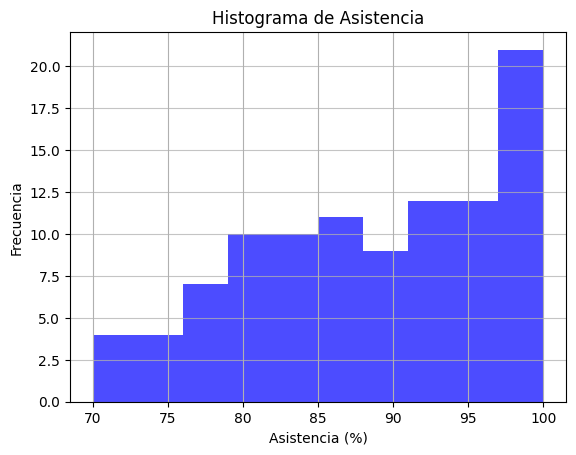

In [6]:
import matplotlib.pyplot as plt

df["Asistencia"].hist(bins=10, color="blue", alpha=0.7)
plt.title("Histograma de Asistencia")
plt.xlabel("Asistencia (%)")
plt.ylabel("Frecuencia")
plt.grid(axis="y", alpha=0.75)
plt.show()


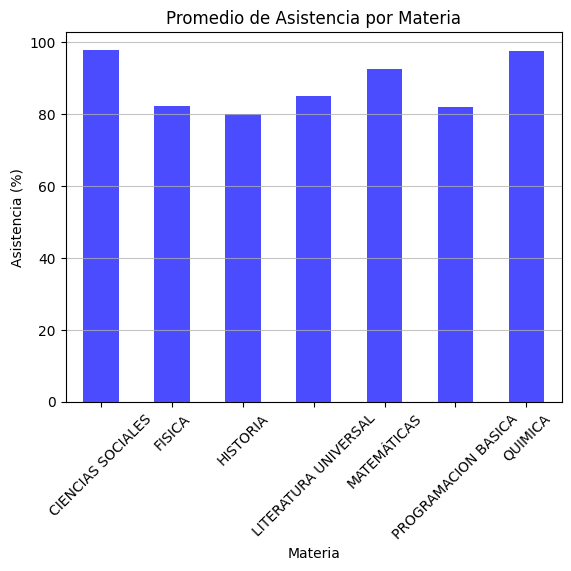

In [7]:
df.groupby("Materia")["Asistencia"].mean().plot(kind="bar", color="blue", alpha=0.7)
plt.title("Promedio de Asistencia por Materia")
plt.xlabel("Materia")
plt.ylabel("Asistencia (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.75)
plt.show()

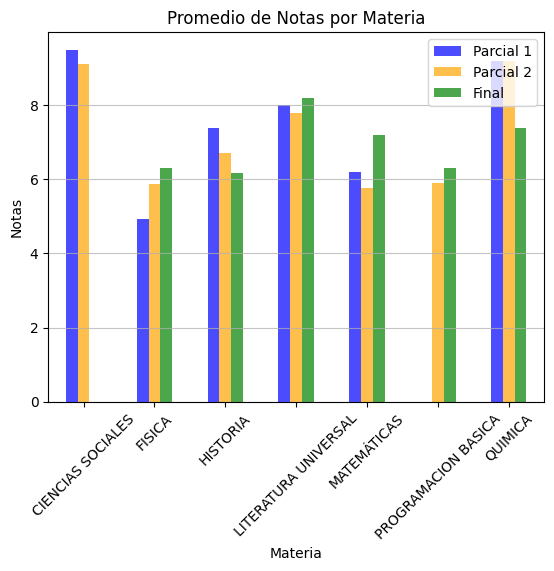

In [8]:
df.groupby("Materia")[cols_notas].mean().plot(kind="bar", color=["blue", "orange", "green"], alpha=0.7)
plt.title("Promedio de Notas por Materia")
plt.xlabel("Materia")
plt.ylabel("Notas")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.75)
plt.legend(cols_notas)
plt.show()

### 6. Exportación a Archivo SQLite
Exportamos el DataFrame limpio a una base de datos SQLite.

In [9]:
import sqlite3

conn = sqlite3.connect("calificaciones.db")
df.to_sql("calificaciones", conn, if_exists="replace", index=False)
conn.close()
